In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [11]:
# Definition of several utility functions.
def modulate(bits, modtype):
    if(modtype==2):
        symbols_bpsk = [-1.0 + 1j*0.0, 1.0 + 1j*0.0]
        ip = symbols_bpsk[bits]
        # Normalization of energy to 1.
        symbol = (1.0/np.sqrt(1.0))*ip
    elif(modtype==4):
        symbols_qpsk = [-1.0 - 1j*1.0, -1.0 + 1j*1.0, 1.0 - 1j*1.0, 1.0 + 1j*1.0]
        ip = symbols_qpsk[bits]
        # Normalization of energy to 1.
        symbol = (1.0/np.sqrt(2.0))*ip
    elif(modtype==16):
        symbols_16qam = [-3.0 - 1j*3.0, -3.0 - 1j*1.0, -3.0 + 1j*3.0, -3.0 + 1j*1.0, 
                         -1.0 - 1j*3.0, -1.0 - 1j*1.0, -1.0 + 1j*3.0, -1.0 + 1j*1.0, 
                         +3.0 - 1j*3.0, +3.0 - 1j*1.0, +3.0 + 1j*3.0, +3.0 + 1j*1.0,
                         +1.0 - 1j*3.0, +1.0 - 1j*1.0, +1.0 + 1j*3.0, +1.0 + 1j*1.0
                        ]
        ip = symbols_16qam[bits]
        # Normalization of energy to 1.
        symbol = (1.0/np.sqrt(10.0))*ip
    else:
        print('Error: Modulation not implemented.')
        
    return symbol

In [12]:
# Number of symbols to be transmitted.
N = 1000

# Create Es/N0 vector.
EsN0dB = 15
EsN0Lin = 10.0**(-(EsN0dB/10.0))

# Number of classes.
C = 2

# Generate random modulations.
mod = np.random.randint(0, C, (N,))

y = np.zeros((N, 1), dtype=complex)
for i in range(0, N):
    
    if(mod[i] == 0):
        # Generate BPSK symbols.
        bit_bpsk = np.random.randint(0, 2)
        # Modulate the binary stream into BPSK symbols.
        symbol = modulate(bit_bpsk, 2)
    elif(mod[i] == 1):
        # Generate QPSK symbols.
        bit_qpsk = np.random.randint(0, 4)
        # Modulate the binary stream into QPSK symbols.
        symbol = modulate(bit_qpsk, 4)
    else:
        # Generate 16QAM symbols.
        bit_16qam = np.random.randint(0, 16)
        # Modulate the binary stream into 16QAM symbols.
        symbol = modulate(bit_16qam, 16)        
        
    # Pass QPSK symbols through AWGN channel.
    noise = np.sqrt(EsN0Lin/2.0)*(np.random.randn() + 1j*np.random.randn())    
    y[i] = symbol + noise

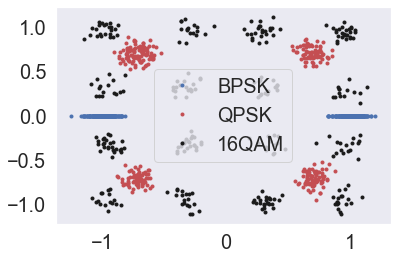

In [13]:
if(C >= 1):
    idx0 = np.argwhere(mod == 0)
    plt.plot(np.real(y[idx0.ravel()]), np.zeros((len(idx0),1)), '.', label='BPSK')
if(C >= 2):
    idx1 = np.argwhere(mod == 1)
    plt.plot(np.real(y[idx1.ravel()]), np.imag(y[idx1.ravel()]), 'r.', label='QPSK')
if(C >= 3):
    idx2 = np.argwhere(mod == 2)
    plt.plot(np.real(y[idx2.ravel()]), np.imag(y[idx2.ravel()]), 'k.', label='16QAM')

plt.grid()
plt.legend()
plt.show()

In [5]:
X = np.c_[np.real(y), np.imag(y)]

# Instantiate Logistic classifier.
classifier = LogisticRegression(fit_intercept=True)
# Train the model.
classifier.fit(X, mod)

LogisticRegression()

In [6]:
y_pred = classifier.predict(X)

In [7]:
# Calculate accuracy of class predictions.
accuracy_score(mod, y_pred)

0.333

C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]


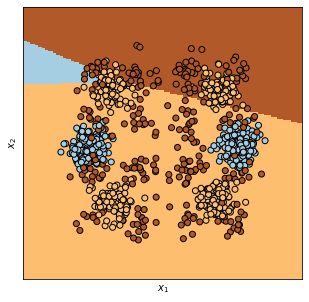

In [8]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=mod, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

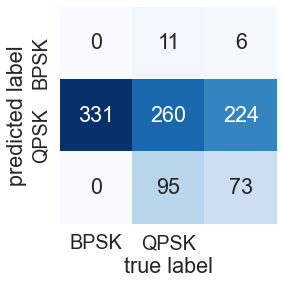

In [9]:
# Plot the confusion matrix
mat = confusion_matrix(mod, y_pred)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['BPSK','QPSK'], yticklabels=['BPSK','QPSK'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()